In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [236]:
def gerador_matriz_def_pos(n):

    # Gera uma matriz aleatória
    A = np.random.randint(0, 5, (n,n))
    #A = np.round(np.random.uniform(0, 1, (n,n)), 1)
    #A = np.round(np.random.rand(n, n), 1)

    # Calcula a matriz (A*A^T) p\ gerar um matriz simetrica
    A = np.dot(A, A.T)

    # Adiciona um fator de escala para evitar valores próprios muito pequenos
    scale_factor = 10
    A = A + np.identity(n) * scale_factor

    # Aplica a decomposição de Cholesky para obter a matriz definida positiva
    L = np.linalg.cholesky(A)

    # Multiplica a matriz triangular inferior pela sua transposta para obter a matriz original
    matriz_def_pos = np.dot(L, L.T)

    return matriz_def_pos

# Exemplo de uso
#n = 5  # Tamanho da matriz
#matriz = gerador_matriz_def_pos(n)
#print(matriz)

In [241]:
def f(A, x, b):
    return 0.5 * np.linalg.norm(np.dot(A, x) - b)**2

def grad_f(A, x, b):
    return np.dot(A.T, np.dot(A, x) - b)

def exact_step(A, x, b):
    grad = grad_f(A, x, b)
    Ag = np.dot(A, grad)  # A * gradiente
    return np.dot(grad, grad) / np.dot(grad, np.dot(A.T, Ag))

# Método do Gradiente
def gradiente(A, b, Lambda=None, iters=100):
    x = np.zeros(len(b))
    x_values = [x]

    for _ in range(iters):
        grad = grad_f(A, x, b)
        if Lambda == None:
            Lambda = exact_step(A, x, b)
        x = x - Lambda * grad
        x_values.append(x)

    return x_values

# Método Nesterov
def nesterov(A, b, Lambda=None, iters=100):
    x = np.zeros(len(b))
    y = np.zeros(len(b))
    x_values = [x]
    t = 1

    for _ in range(iters):
        x_prev = x
        if Lambda == None:
            Lambda = exact_step(A, x, b)
        y = x - Lambda * grad_f(A, x, b)
        t_next = 0.5 * (1 + np.sqrt(1 + 4 * t**2))
        x = y + (t - 1) / t_next * (y - x_prev)
        t = t_next
        x_values.append(x)

    return x_values


# Método dos Gradientes conjugados
def conjugate_gradient(A, b, iters=100):

    x = np.zeros(len(b))
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(r.T, r)
    x_values = [x]

    for i in range(iters):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap)
        x = x + alpha * p
        x_values.append(x)
        r = r - alpha * Ap
        r_new = np.dot(r.T, r)

        if np.sqrt(r_new) < 1e-8:
           break

        p = r + (r_new / rsold) * p
        rsold = r_new

    return x_values

In [253]:
# Exemplo
A= np.array([[30.,  4.,  4.,  8., 14.],
             [ 4., 33., 26., 10., 21.],
             [ 4., 26., 50., 14., 20.],
             [ 8., 10., 14., 20., 14.],
             [14., 21., 20., 14., 38.]])

#A = gerador_matriz_def_pos(5)
n = len(A)
b = 100*np.ones(n)
L = np.linalg.eigvals(A).max()

print(f"Valor de lambda deve ser menor que {1/L}")

x_values = gradiente(A, b)
f_values_md = [f(A, x, b) for x in x_values]

x_values = nesterov(A, b)
f_values_nes = [f(A, x, b) for x in x_values]

x_values = conjugate_gradient(A, b)
f_values_cg = [f(A, x, b) for x in x_values]

Valor de lambda deve ser menor que 0.010458835602595367


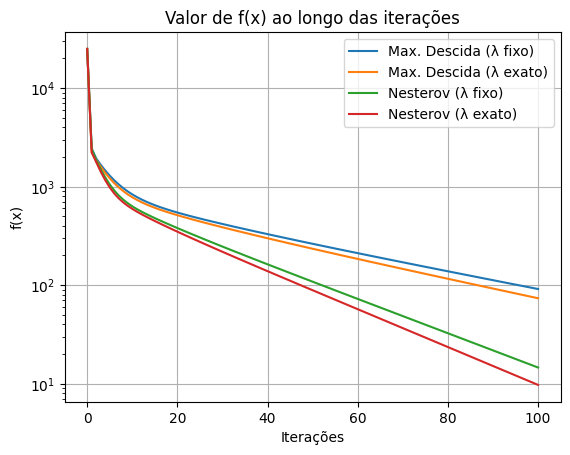

In [256]:
plt.plot([f(A, x, b) for x in gradiente(A, b, Lambda=0.0001, iters=100)]) # Passo fixo
plt.plot(f_values_md)

plt.plot([f(A, x, b) for x in nesterov(A, b, Lambda=0.0001, iters=100)]) # Passo fixo
plt.plot(f_values_nes)

#plt.plot(f_values_cg)
plt.legend([ 'Max. Descida (λ fixo)', 'Max. Descida (λ exato)',
             'Nesterov (λ fixo)', 'Nesterov (λ exato)', 'Grad. Conjugados'])
plt.xlabel('Iterações')
plt.ylabel('f(x)')
plt.yscale('log')
plt.grid(True)
plt.title('Valor de f(x) ao longo das iterações')
plt.show()